<img src="http://ipython.org/_static/IPy_header.png" alt="IPython notebook" width="50%" height="50%">
<img src="https://jupyter.org/images/jupyter-sq-text.svg" alt="Jupyter" width="15%" height="15%">
#　
#　

<div style="text-align: center; font-size:30px; line-height:1.6em;">
IPython notebookを使ったハンズオンセミナー
</div>
<div style="text-align: center; font-size:30px; line-height:1.6em;">
可視化編
</div>
#　
#　

#自己紹介

<div style='text-align:center;'>
<p style='text-align:center;'>池本 健太郎(いけもと けんたろう)</p>
<img src='https://fbcdn-profile-a.akamaihd.net/hprofile-ak-xfa1/v/t1.0-1/c0.40.160.160/p160x160/1654104_10202967855974671_1454116715_n.jpg?oh=44afdeba7e97203a68b3b179a2dd389b&oe=557762B6&__gda__=1436793082_abf6059d7cb026abeb4ef035c148d2a2' style='height:128px;width:128px;margin:auto auto;'>
</div>

- shaping tommorow with youな会社でデータコンサル的な仕事しています

###本日のテーマ

##### PandasのデータフレームをMatplotlibを使って
##### 　
##### IPython notebook上で可視化してみよう

###IPython notebookの概要

###IPython notebook 3.0がリリース（2015年2月）
    

- 今後Jupyterという名称へ

- マルチ言語サポート（Python2,3 共存、R言語、Ruby、Scala, Go, Node.js等）

###IPython notebookとは（1/2）


- ブラウザ上で、Pythonのコード、IPythonのコマンドを実行、編集、保存ができる
    
    コンソール上のIPythonでは、ノートとしては保存できない


- IPython Notebook Viewer

    Github経由でノートブックをWebで公開・共有できる


###IPython notebookとは（2/2）


- IPythonの機能であるマルチコアの並列計算が可能

    MPI連携による並列クラスターの実行も可能


- 様々なコンテンツをノートブックに埋め込むことができる

    PNG, JPEG, SVG, Latex, Markdown, HTML, Javascript：D3.js

    Matplotlib (定番)

    Bokeh（注目）

####様々なコンテンツをノートブック上に埋め込んでみた①

#### Webページを描画
> https://jupyter.org/

In [1]:
from IPython.display import HTML
HTML('<iframe src=https://jupyter.org/ width=1000 height=350></iframe>')

#### 様々なコンテンツをノートブック上に埋め込んでみた②

####D3.jsで描画したグラフ
> Force-Directed Graph (http://bl.ocks.org/mbostock/4062045)

In [2]:
%%html

<div id="d3-example"></div>

<style>
.node {stroke: #fff; stroke-width: 1.5px;}
.link {stroke: #999; stroke-opacity: .6;}
</style>

In [3]:
%%javascript

require.config({paths: {d3: "http://d3js.org/d3.v3.min"}});

require(["d3"], function(d3) {
  var width = 600,
      height = 400;

  var color = d3.scale.category20();

  var force = d3.layout.force()
    .charge(-120)
    .linkDistance(30)
    .size([width, height]);

  var svg = d3.select("#d3-example").append("svg")
    .attr("width", width)
    .attr("height", height);

  d3.json("miserables.json", function(error, graph) {
    force.nodes(graph.nodes)
         .links(graph.links)
         .start();

    var link = svg.selectAll(".link")
        .data(graph.links)
        .enter().append("line")
        .attr("class", "link")
        .style("stroke-width", function(d) { return Math.sqrt(d.value); });

    var node = svg.selectAll(".node")
        .data(graph.nodes)
        .enter().append("circle")
        .attr("class", "node")
        .attr("r", 5)
        .style("fill", function(d) { return color(d.group); })
        .call(force.drag);

    node.append("title")
        .text(function(d) { return d.name; });

    force.on("tick", function() {
      link.attr("x1", function(d) { return d.source.x; })
          .attr("y1", function(d) { return d.source.y; })
          .attr("x2", function(d) { return d.target.x; })
          .attr("y2", function(d) { return d.target.y; });

      node.attr("cx", function(d) { return d.x; })
          .attr("cy", function(d) { return d.y; });
    });
  });
});

<IPython.core.display.Javascript object>

#### 様々なコンテンツをノートブック上に埋め込んでみた③

####Matpltlib
>Pandas（http://pandas.pydata.org/pandas-docs/dev/visualization.html）


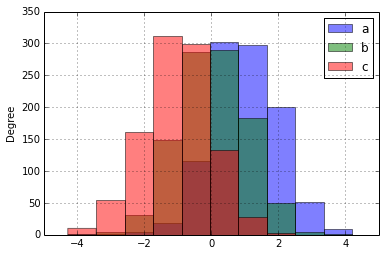

In [4]:
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
df4 = pd.DataFrame({'a':np.random.randn(1000) + 1, 'b': np.random.randn(1000), 'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])

df4.plot(kind='hist', alpha=0.5)

#### 様々なコンテンツをノートブック上に埋め込んでみた④

####Bokeh
>iris（http://bokeh.pydata.org/en/latest/docs/gallery/iris.html）

In [17]:
from IPython.display import HTML
HTML('<iframe src=http://bokeh.pydata.org/en/latest/docs/gallery/iris.html width=1000 height=350></iframe>')

'''
from bokeh.sampledata.iris import flowers
from bokeh.plotting import *

colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
flowers['color'] = flowers['species'].map(lambda x: colormap[x])

output_file("iris.html", title="iris.py example")

p = figure(title = "Iris Morphology")
p.xaxis.axis_label = 'Petal Length'
p.yaxis.axis_label = 'Petal Width'

p.circle(flowers["petal_length"], flowers["petal_width"],
        color=flowers["color"], fill_alpha=0.2, size=10, )
'''

'''output_notebook()
show(p)
'''

####様々なコンテンツをノートブック上に埋め込んでみた（まとめ）

本当に様々なコンテンツが取り扱えます！

Bokehは動的なグラフが作成できるのが魅力！

Matplotlibで静的グラフ作成手法を身につけてから！

#### Matplotlibを使ったグラフ作成について

機能が多すぎて全部紹介できません

簡単にグラフを書く方法は何通りか存在しますが、

その中でお勧めなのは・・・

Pandasのデータフレームを使った方法です！

Pandasのデータフレームからグラフを簡単に作成する方法をご紹介します

####PandasのデータフレームをMatplotlibを使って
####　
####IPython notebook上で可視化してみよう

pandasのデータフレーム（以下df）に対して

df.plot(グラフタイプ)　を実行する

これだけです！

実際にグラフを作成してみます　

サンプルデータを用意します

In [6]:
import matplotlib.pylab as plt
import pandas as pd
df = pd.DataFrame({'a':pow(np.random.rand(10) ,2), 'b': pow(np.random.randn(10),2), 'c': pow(np.random.randn(10) ,2)})

In [7]:
df


,a,b,c
0,0.048208,0.111252,1.088292
1,0.821531,5.535940,0.520871
2,0.600887,0.450302,0.883845
3,0.405440,3.474488,0.227334
4,0.016834,0.004422,0.003313
5,0.001452,0.117984,1.507604
6,0.748344,0.525284,0.000479
7,0.511793,0.085441,0.526925
8,0.454665,0.027902,0.426610
9,0.535294,0.258794,0.997124


折れ線グラフを描画してみます

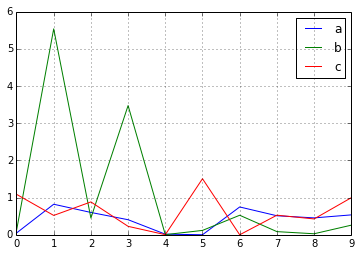

In [8]:
df.plot(kind='line')

今度は棒グラフです

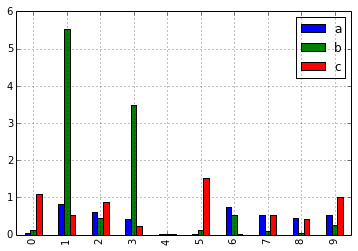

In [9]:
df.plot(kind='bar')

####主要グラフのまとめ
df.plot(option1, option2)

| グラフの種類 | option1 | option2 |
|-----------|-------|-------|
|折れ線グラフ  |kind='line'    |           |
|棒グラフ     |kind='bar'    |           |
|棒グラフ（水平）|kind='barh'||
|棒グラフ（積み上げ）|kind='bar'  | stacked=True|
|ヒストグラム|kind='hist' | |
|ヒストグラム（積み上げ）|kind='hist'|stacked=True|
|面グラフ（積み上げ）|kind='area'||
|面グラフ|kind='area'|stacked=False|
|散布図|kind='scatter'|x=項目名, y=項目名|
|円グラフ|kind='pie'| |

これだけだと味気ないグラフなので、

もう少しオプションを紹介します

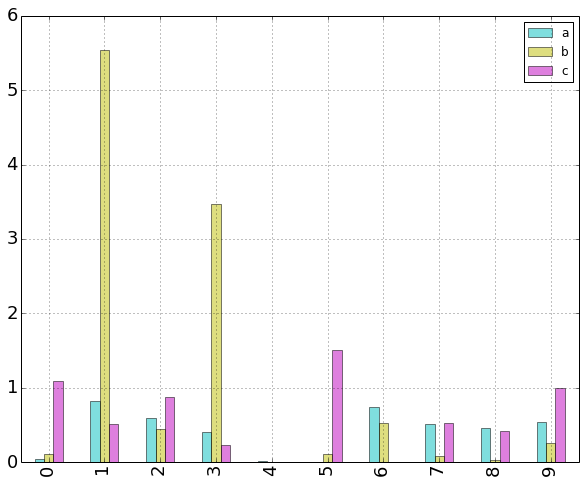

In [10]:
df.plot(kind='bar', color=['c','y','m'],alpha=0.5,figsize=(10,8),fontsize=18)

主要グラフに使える追加オプション
df.plot(option1, option2, option3)


|グラフの種類|オプションの種類|option3|値の範囲|
|-----------|-----------|-------|-------|
|共通|線の色|color=|['r', 'g', 'b', 'c']|
|共通|線の透明度|alpha=|0-1|
|共通|フォントサイズ|fontsize=|デフォルトは12|
|共通|グラフのサイズ|figsize(x,y)|インチ：デフォルトは(8, 6)|
|共通|サブプロット|subplots=|True|
|共通|線の種類|style=|'-'：破線、'.'：点線
|共通|凡例|legend=|True
|共通|凡例のラベル名|label=|任意（columns以外）
|ヒストグラム|ビンの数|bins=|適当（最適な数は存在しない）|
|散布図|カラーマップ|c=|項目名|
|散布図|点の大きさ|s=|デフォルトは25、df['c']で各点対応|

b: blue; g: green; r: red; c: cyan; m: magenta; y: yellow; k: black; w: white

オプションには無いが、必須なもの

- タイトル
- X軸とY軸のラベル

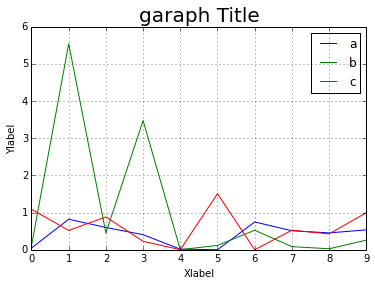

In [11]:
graph_data = df.plot(kind='line')
graph_data.set_xlabel('Xlabel')
graph_data.set_ylabel('Ylabel')
graph_data.set_title('garaph Title',fontsize=20)

複数のグラフを並べたい

1. 同一グラフの複数プロットを分割
2. 複数のグラフ

####同一グラフの複数プロットを分割
subplots=Trueを追加します

array([<matplotlib.axes.AxesSubplot object at 0x108d96050>,
       <matplotlib.axes.AxesSubplot object at 0x108e4fe10>], dtype=object)

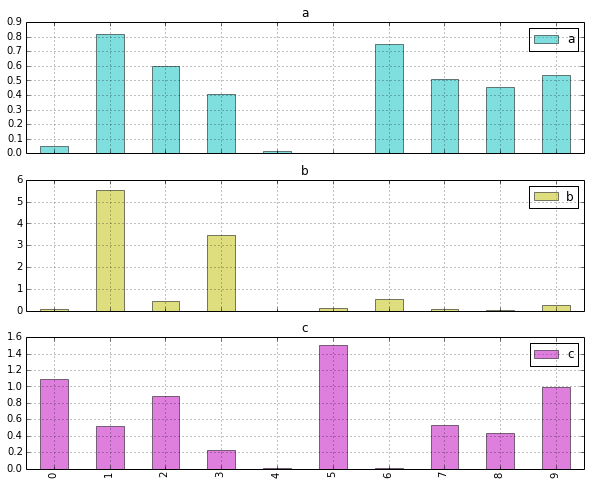

In [12]:
df.plot(kind='bar', color=['c','y','m'],alpha=0.5,figsize=(10,8),subplots=True)

####複数のグラフ
オプションはありません。。

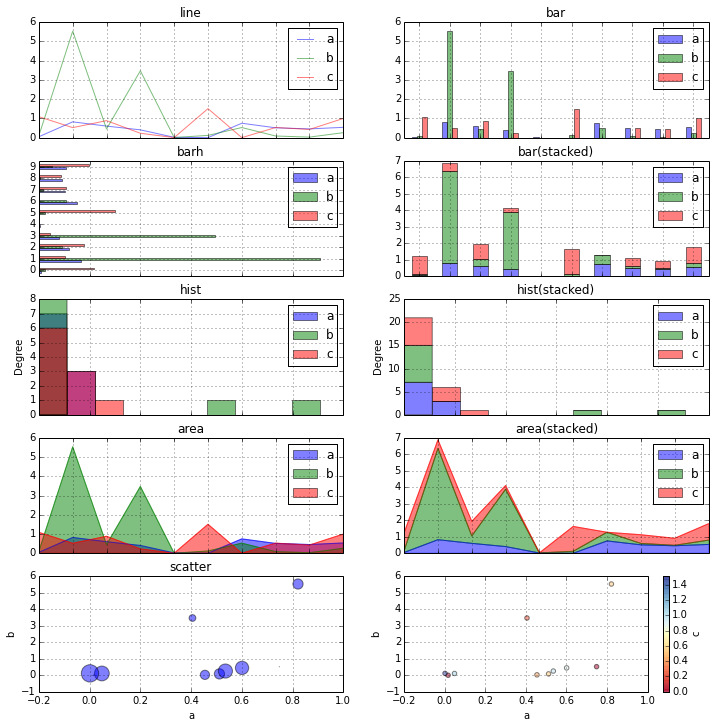

In [13]:

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 12))
graph_data0=df.plot(kind='line',alpha=0.5,ax=axes[0,0])
graph_data1=df.plot(kind='bar',alpha=0.5,ax=axes[0,1])
graph_data2=df.plot(kind='barh',alpha=0.5,ax=axes[1,0])
graph_data3=df.plot(kind='bar',alpha=0.5,stacked=True,ax=axes[1,1])
graph_data4=df.plot(kind='hist',alpha=0.5,ax=axes[2,0])
graph_data5=df.plot(kind='hist',alpha=0.5,stacked=True,ax=axes[2,1])
graph_data6=df.plot(kind='area',alpha=0.5,stacked=False,ax=axes[3,0])
graph_data7=df.plot(kind='area',alpha=0.5,stacked=True,ax=axes[3,1])
graph_data8=df.plot(kind='scatter',alpha=0.5, x='a', y='b', s=df['c']*200,ax=axes[4,0])
cm = plt.cm.get_cmap('RdYlBu')
graph_data9=df.plot(kind='scatter',alpha=0.5, x='a', y='b', c='c',cmap=cm,ax=axes[4,1])


graph_data0.set_title('line')
graph_data1.set_title('bar')
graph_data2.set_title('barh')
graph_data3.set_title('bar(stacked)')
graph_data4.set_title('hist')
graph_data5.set_title('hist(stacked)')
graph_data6.set_title('area')
graph_data7.set_title('area(stacked)')
graph_data8.set_title('scatter')


簡単に色々なグラフが作成できます！

慣れてきたら、自分のお気に入りが探してみましょう

http://matplotlib.org/gallery.html

In [14]:
from IPython.display import HTML
HTML('<iframe src=http://matplotlib.org/gallery.html width=1000 height=350></iframe>')

<img src="http://ipython.org/_static/IPy_header.png" alt="IPython notebook" width="50%" height="50%">
<img src="https://jupyter.org/images/jupyter-sq-text.svg" alt="Jupyter" width="15%" height="15%">